In [1]:
import os
import decimal
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math


In [2]:
ZtoSym = {0:'Nn', 1:'H', 2:'He', 3:'Li', 4:'Be', 5:'B', 6:'C', 7:'N', 8:'O', 9:'F',
10:'Ne', 11:'Na', 12:'Mg', 13:'Al', 14:'Si', 15:'P', 16:'S', 17:'Cl', 18:'Ar',
19:'K', 20:'Ca', 21:'Sc', 22:'Ti', 23:'V', 24:'Cr', 25:'Mn', 26:'Fe', 27:'Co',
28:'Ni', 29:'Cu', 30:'Zn', 31:'Ga', 32:'Ge', 33:'As', 34:'Se', 35:'Br', 36:'Kr',
37:'Rb', 38:'Sr', 39:'Y', 40:'Zr', 41:'Nb', 42:'Mo', 43:'Tc', 44:'Ru', 45:'Rh',
46:'Pd', 47:'Ag', 48:'Cd', 49:'In', 50:'Sn', 51:'Sb', 52:'Te', 53:'I', 54:'Xe',
55:'Cs', 56:'Ba', 57:'La', 58:'Ce', 59:'Pr', 60:'Nd', 61:'Pm', 62:'Sm', 63:'Eu',
64:'Gd', 65:'Tb', 66:'Dy', 67:'Ho', 68:'Er', 69:'Tm', 70:'Yb', 71:'Lu', 72:'Hf',
73:'Ta', 74:'W', 75:'Re', 76:'Os', 77:'Ir', 78:'Pt', 79:'Au', 80:'Hg', 81:'Tl',
82:'Pb', 83:'Bi', 84:'Po', 85:'At', 86:'Rn', 87:'Fr', 88:'Ra', 89:'Ac', 90:'Th',
91:'Pa', 92:'U', 93:'Np', 94:'Pu', 95:'Am', 96:'Cm', 97:'Bk', 98:'Cf', 99:'Es',
100:'Fm', 101:'Md', 102:'No', 103:'Lr', 104:'Rf', 105:'Db', 106:'Sg', 107:'Bh',
108:'Hs', 109:'Mt', 110:'Ds', 111:'Rg', 112:'Cn', 113:'Nh', 114:'Fl', 115:'Mc',
116:'Lv', 117:'Ts', 118:'Og', 119:'Ze', 120:'Zf', 121:'Zg', 122:'Zh', 123:'Zi',
124:'Zj', 125:'Zk', 126:'Zl', 127:'Zm', 128:'Yn', 129:'Zo', 130:'Zp', 131:'Zq',
132:'Yr', 133:'Zs', 134:'Zt', 135:'Zu', 136:'Zv', 137:'Zw', 138:'Zx', 139:'Zy',
140:'Zz'}

SymtoZ = {value: key for key, value in ZtoSym.items()}

def ZtoSymbol(Z):
    if Z in ZtoSym:
        return ZtoSym[Z]
    else:
        return f"No conversion found for {Z}"

def SymboltoZ(element):
    element_lower = re.sub(r'\d', '', element.strip().lower())
    for number, symbol in ZtoSym.items():
        if len(element.strip()) == 1:
            if element.strip() == 'p':
                return '1'
            if element.strip() == 'd':
                return '1'
            if element.strip() == 't':
                return '1'
            if element.strip() == 'nn':
                return '0'
          
    for number, symbol in ZtoSym.items():
        if symbol.lower() == element_lower:
            return number
        elif element_lower == 'al-':
            return '13'
        elif element_lower == 'al*':
            return '13'
    return None

In [3]:
#Enter path to run directory where NuGrid data is stored (must contain isotopedatabase.txt and iso_massf files)
#path = '/shared/storage/physnp/ahs539/Nugrid/NuPPN/frames/ppn/2.0_mass_iniab_age_tests/early_phase_high_ang_mom/M15/M15_1e-5'
#path = '/shared/storage/physnp/ahs539/Nugrid/NuPPN/frames/ppn/1.5_solar_mass_trajectories_age_diff/mid_phase_high_ang_mom/M15/M15_1e-5'
path = '/shared/storage/physnp/ahs539/Nugrid/SWJ_nuppn_boundary_fix/frames/ppn/M15_CE_full_iniabs/mid_phase_full_iniab_oct_25/f1a5mcr1.5md1e-5'
#enter a name for saving figures
run_name = 'M15_' + path[130:] + '_average_' + path[90:99]
save_path = '/shared/storage/physnp/ahs539/CE_paper_dat_and_figs'
#save figure? 
save_figure = False #False/True

#Limits and parameters
Max_Z = 60
Min_Z = -1
Max_N = 70
Min_N = -1
iso_upper = 1
Isomass_Lim = 1e-15#3.35e-13
alpha = 0.8 # level of transparency 
top_iso = []

#read in the list of stable isotopes for plotting
dtype = [('col1', int), ('col2', 'int'), ('col3', 'U1'), ('col4', 'U1'), 
         ('col5', 'U10'), ('col6', float), ('col7', float), ('col8', float), ('col9', int)]
stable_list = pd.read_csv('Stable_isotope.DAT', header=None, skiprows=47,  sep='\s+')
stable = stable_list.values.tolist()
only_stable = []
for I in range(len(stable)):
    if stable[I][2] == '-':
        only_stable.append(stable[I][0:4])

In [4]:
print(len(path))
print(path[129:])
print(path[-44:-33])
print(path[90:100])

134
d1e-5
mid_phase_f
mid_phase_


In [5]:
list = sorted(os.listdir(path))
inner_r = [y for y in list if y.startswith('N_Traj') and y.endswith('E+06')]
sorted_inner_r = sorted(inner_r, key=lambda x: float(x.split('=')[1]))

iso_data = []
for s in sorted_inner_r:
    if os.path.exists(path + '/' + s + '/iso_massf00335.DAT'):
        mass_in = pd.read_csv(path + '/' + s + '/iso_massf00335.DAT', sep='\s+',
                            skiprows = 7, header = None,
                            usecols =[x for x in range(0,6)], dtype='string')
        mass_in_list = mass_in.values.tolist()
        iso_data.append(mass_in_list)

data = iso_data[0]

for i in range(len(iso_data[0])):
    A = 0
    for j in range(len(iso_data)):
        A = A + float(iso_data[j][i][4])
    print(A)
    data[i][4] = (A/float(len(iso_data)))

1.850100106e-20
3.8478209999999997
3.015434e-17
1.7390259999999998e-13
2.3195228
6.7693060541e-06
4.91691743113e-23
2.7228964873e-14
1.58641159609e-12
4.3117334968200003e-13
2.8121877000000003e-05
4.5061205e-06
5.2208101e-06
3.4577933000000003e-05
9.16213036255e-23
0.00038093571299999997
2.4748712e-08
5.818284299999999e-09
3.825798201688e-07
4.43075577e-11
8.669631489461001e-06
5.7353799540000005e-08
0.000651216906
1.87511519e-07
2.450589771e-08
0.007761271480700001
0.009268680912000001
1.590610175029496e-13
4.1669721989999995e-05
0.000862144807
9.396497530000001e-13
8.30863597e-05
0.00093278692
7.386684e-29
0.001865815194
0.0021822662889999997
0.010449744463
0.01248545852
3.1312027e-29
4.463785359739999e-39
2.73563888e-07
2.9954680399999998e-05
5.427283697989999e-13
1.251798224931405e-20
8.320929e-29
0.0013814784462
8.000000000000002e-99
8.000000000000002e-99
8.000000000000002e-99
8.000000000000002e-99
1.61722568e-27
8.000000000000002e-99
8.000000000000002e-99
8.000000000000002e-99
7.

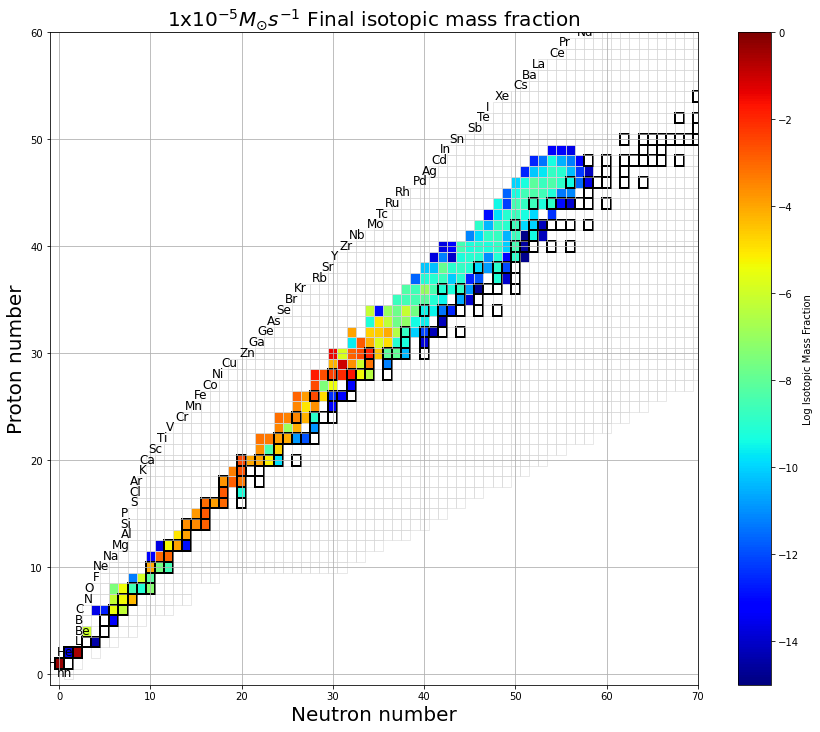

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(18,12))
plt.xlim(-1, 200)#template limits - set these larger than the highest Z and A isotope 
plt.ylim(-1, 85)

iso_db_path = path + '/' + s + '/' +'isotopedatabase.txt'
iso_db_in = pd.read_csv(iso_db_path, sep='\s+', 
                        skiprows=2,dtype='string', #skip to isotope data in file reading
                        usecols=[x for x in range(0,5)]) # use only 6 columns to store data (shape of file)
iso_db_list = iso_db_in.values.tolist()

cmap = cm = plt.get_cmap('jet')#'cubehelix'
norm = matplotlib.colors.Normalize(vmin = math.log(Isomass_Lim, 10), vmax = math.log(iso_upper, 10))
scalarMap = matplotlib.cm.ScalarMappable(norm = norm, cmap = cmap)
scalarMap.set_array([])

for i in range(len(data)):
    if float(data[i][4]) > Isomass_Lim and float(data[i][4]) < iso_upper:
        plt.gca()
        art_1 = mpatches.Rectangle(xy = (float(data[i][2])-0.5-float(data[i][1]) , float(data[i][1])-0.5), width = 1, height = 1, edgecolor='lightgrey', facecolor = cmap(norm(math.log(float(data[i][4]), 10))), fill =True, lw =0.5)
        ax.add_patch(art_1)

#add the rextangles
j = 0
for i in range(len(iso_db_list)): # list through each isotope
    iso_db_list[i][0] = float(iso_db_list[i][0])#convert Z to float
    iso_db_list[i][1] = float(iso_db_list[i][1])#convert A to float
    #plt.gca()
    art_1 = mpatches.Rectangle(xy = (iso_db_list[i][1]-0.5-iso_db_list[i][0] , iso_db_list[i][0]-0.5), width = 1, height = 1, fc='none', ec='lightgrey', fill =False, lw =0.5) #draw box around each isotope
    
    if iso_db_list[i][0] == float(only_stable[j][0]) and iso_db_list[i][1] == float(only_stable[j][1]):
        art_1 = mpatches.Rectangle(xy = (iso_db_list[i][1]-0.5-iso_db_list[i][0] , iso_db_list[i][0]-0.5), width = 1, height = 1, fc='none', ec='k', fill =True, lw = 2) #draw box around each isotope
        # ax[0].text(iso_db_list[i][1]-iso_db_list[i][0] , iso_db_list[i][0], iso_db_list[i][2] + str(int(iso_db_list[i][1])), ha = 'center', va = 'center', fontsize = 'small', clip_on = True)#add isotope label
        j = j +1
    ax.add_patch(art_1)
    plt.gcf()
    if iso_db_list[i][2] != iso_db_list[i-1][2]:
        plt.gcf()
        ax.text(iso_db_list[i][1]-1.25-iso_db_list[i][0], iso_db_list[i][0]-0.25, iso_db_list[i][2], fontsize ='large', clip_on = True)#add isotope label

plt.colorbar(scalarMap, ax=ax, label = 'Log Isotopic Mass Fraction', orientation = 'vertical')
#plt.title(str('flux_'+ "{0:0=5d}".format(k+1)))
ax.set_ylabel('Proton number', fontsize=20)
ax.set_xlabel('Neutron number', fontsize=20)

ax.set_xlim(Min_N, Max_N)
ax.set_ylim(Min_Z, Max_Z)


ax.set_title('1x10$^{-5} M_{\odot} s^{-1}$ Final isotopic mass fraction' , fontsize=20)
ax.grid(True)
plt.subplots_adjust(hspace=0.3, right = 0.75)
#plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05
if save_figure == True:
    plt.savefig(save_path + '/' + run_name + '_iso_mass_chart.png',  bbox_inches='tight')
else:
    plt.show()